In [77]:
#!pip install wordcloud
#!pip install altair vega_datasets
#!pip install matplotlib
#!pip install requests
!pip install spacy

In [78]:
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
import numpy as np
from nltk import *
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import altair as alt
import spacy
import requests

In [2]:
df = pd.read_csv("location_scraping.csv")
df

,type_location,adresse,prix_par_mois,details,description,supplements
0,Location Appartement,Paris 12e (75012),1.124 €,2 pièces 1 chambre 31 m²,"Paris 12ème. Charmant duplex, entièrement meub...",| Porte de Vincennes| Alexandra David-Néel| Sa...
1,Location Appartement,Pontoise (95000),520 €,1 pièce 1 chambre 22 m²,"Colocation Idéalement située, car proche des é...",| Pontoise| Cergy - Préfecture| Osny
2,Location Appartement,Noisy-le-Grand (93160),910 €,2 pièces 1 chambre 38 m²,2 pièces proche RER de Noisy le Grand comprena...,| Noisy-le-Grand - Mont d’Est| Bry-sur-Marne| ...
3,Location Appartement,Paris 9e (75009),1.224 €,2 pièces 1 chambre 29 m²,Très joli F2 appartement au 5eme étage avec as...,| Havre - Caumartin| Auber| Madeleine
4,Location Appartement,Courbevoie (92400),2.880 €,4 pièces 3 chambres 105 m²,"Superbe 4 pièces de 105 m² récemment rénové, c...",| Courbevoie| Esplanade de la Défense| Faubour...
...,...,...,...,...,...,...
244,Location Appartement,Sainte-Geneviève-des-Bois (91700),1.000 €,3 pièces 2 chambres 62 m²,Dans zone pavillonnaire. Proche commerces. F3 ...,NaN
245,Location Appartement,Choisy-le-Roi (94600),780 €,2 pièces 1 chambre 40 m²,"Appartement 2 pièces 40 m², calme et ensoleill...",| Choisy-le-Roi| Les Saules| Orly - Ville
246,Location Appartement,Bagnolet (93170),1.200 €,2 pièces 1 chambre 50 m²,"Appartement neuf meublé 2 pièces, Surface 50 m...",| Mairie des Lilas| Collège Gustave Courbet| L...
247,Location Appartement,Neuville-sur-Oise (95000),500 €,1 pièce 1 chambre 13 m²,Colocation. Proche gare de Neuville-Université...,NaN


In [8]:
df['type_location'][0]

'Location Appartement'

In [16]:
loc = [df['supplements']]
for i in range(len(loc)):
    if loc[i] is np.nan:
        print(i)
        

In [206]:
types_ =[]
#print(df["type"])
for ty in df["type_location"]:
    if ty=="Location Maison":
        types_.append("Maison")
    else : types_.append("Appartement")
print(len(types_))

249


In [4]:
tokens= []
for i in range(len(df["adresse"])):
    tok = WordPunctTokenizer().tokenize(df["adresse"][i])
    tokens.append(tok)
print(len(tokens))

249


In [6]:
adr = []
for tk in tokens:
    for i in range(len(tk)):
        if tk[i]=='(':
            for j in range(i+1, len(tk)-1):
                if tk[j].isdigit:
                    adr.append(tk[j])  
print(len(adr))

249


In [9]:
def geocommune(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['nom']
    if nom =='Paris':
        par = "codePostal={adr}&type={t}".format(
            adr = adre,
            t = "arrondissement-municipal"
        )
        re = requests.get(base_url, params=par)
        d = re.json()
        nom = d[0]['nom']
    return nom
nom_commune = []
for i in range(len(adr)):
    nom_commune.append(geocommune(adr[i]))
print(len(nom_commune))
print(nom_commune)

249
['Paris 12e Arrondissement', 'Boisemont', 'Noisy-le-Grand', 'Paris 9e Arrondissement', 'Courbevoie', 'Paris 16e Arrondissement', 'Sèvres', 'Fontenay-sous-Bois', 'Paris 16e Arrondissement', 'Évry-Courcouronnes', 'La Chapelle-Rablais', 'Paris 4e Arrondissement', 'Paris 12e Arrondissement', 'Paris 20e Arrondissement', 'Levallois-Perret', 'Bougival', 'Nanterre', 'Saint-Maur-des-Fossés', 'Le Vésinet', 'Paris 16e Arrondissement', 'Courbevoie', 'Le Chesnay-Rocquencourt', 'Asnières-sur-Seine', 'Chaville', 'Sevran', 'Paris 7e Arrondissement', 'Levallois-Perret', 'Paris 1er Arrondissement', 'Ivry-sur-Seine', 'Paris 18e Arrondissement', 'Paris 17e Arrondissement', 'Créteil', 'Créteil', 'Saint-Denis', 'Suresnes', 'Alfortville', 'Quincy-sous-Sénart', 'Asnières-sur-Seine', 'Gagny', 'Boissettes', 'Courbevoie', 'Saint-Denis', 'Bry-sur-Marne', 'Courbevoie', 'Le Pecq', 'Courbevoie', 'Paris 17e Arrondissement', 'Ivry-sur-Seine', 'Paris 16e Arrondissement', 'Paris 10e Arrondissement', 'Paris 16e Arron

In [194]:
def get_dep(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['codeDepartement']
    return nom
codedep = []
for i in range(len(adr)):
    codedep.append(get_dep(adr[i]))
def get_code(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['code']
    return nom
codecomm = []
for i in range(len(adr)):
    codecomm.append(get_code(adr[i]))

In [197]:
print(len(codedep))

249


In [13]:
price = []
for t in df["prix_par_mois"]:
    token = WordPunctTokenizer().tokenize(t)
    nb = ''
    for i in token:
        if i.isdigit():
            nb = nb + i
    price.append(nb)
print(price[4])
len(price)

2880


249

In [16]:
#tokens = []
for t in df["details"]:
    token = WordPunctTokenizer().tokenize(t)
    print(token)

['2', 'pièces', '1', 'chambre', '31', 'm²']
['1', 'pièce', '1', 'chambre', '22', 'm²']
['2', 'pièces', '1', 'chambre', '38', 'm²']
['2', 'pièces', '1', 'chambre', '29', 'm²']
['4', 'pièces', '3', 'chambres', '105', 'm²']
['3', 'pièces', '2', 'chambres', '60', 'm²']
['1', 'pièce', '20', 'm²']
['2', 'pièces', '1', 'chambre', '80', 'm²']
['1', 'pièce', '16', 'm²']
['1', 'pièce', '1', 'chambre']
['2', 'pièces', '1', 'chambre', '27', 'm²']
['2', 'pièces', '1', 'chambre', '35', 'm²']
['2', 'pièces', '1', 'chambre', '47', 'm²']
['2', 'pièces', '1', 'chambre', '82', 'm²']
['1', 'pièce', '24', 'm²']
['2', 'pièces', '1', 'chambre', '28', 'm²']
['3', 'pièces', '2', 'chambres', '65', 'm²']
['1', 'pièce', '16', 'm²']
['2', 'pièces', '1', 'chambre', '26', 'm²']
['6', 'pièces', '3', 'chambres', '180', 'm²']
['2', 'pièces', '1', 'chambre', '43', 'm²']
['1', 'pièce', '17', 'm²']
['2', 'pièces', '1', 'chambre', '40', 'm²']
['1', 'pièce', '21', 'm²']
['1', 'pièce', '1', 'chambre']
['3', 'pièces', '2', 'c

In [20]:
piece = []
piece.append('pièces')
piece.append('pièce')
print(piece)
pieces = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    if tokens[1] in piece:
        pieces.append(tokens[0])
    else : pieces.append(0)
print(pieces)
print(len(pieces))

['pièces', 'pièce']
['2', '1', '2', '2', '4', '3', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '3', '1', '2', '6', '2', '1', '2', '1', '1', '3', '1', '2', '2', '1', '2', '4', '3', '2', '2', '1', '2', '2', '2', '1', '4', '1', '1', '2', '1', '3', '3', '3', '3', '3', '1', '2', '2', '1', '2', '4', '1', '2', '1', '2', '1', '1', '1', '1', '1', '3', '2', '4', '2', '1', '1', '2', '2', '1', '1', '2', '2', '2', '2', '2', '3', '2', '6', '1', '2', '3', '3', '3', '2', '3', '1', '4', '1', '4', '1', '1', '1', '2', '2', '1', '3', '1', '1', '2', '4', '2', '1', '2', '2', '2', '3', '1', '2', '1', '3', '4', '3', '2', '1', '2', '7', '3', '4', '2', '1', '4', '2', '3', '4', '2', '2', '2', '3', '1', '2', '2', '1', '2', '3', '3', '1', '1', '1', '3', '1', '3', '1', '3', '4', '2', '4', '2', '1', '1', '5', '2', '3', '5', '1', '4', '1', '5', '2', '3', '3', '1', '3', '1', '1', '3', '1', '5', '1', '2', '1', '3', '3', '3', '3', '1', '1', '2', '2', '1', '4', '2', '1', '5', '2', '2', '3', '3', '1', '2', '1', '3',

In [24]:
cbr = []
cbr.append('chambres')
cbr.append('chambre')
chambres = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    if tokens[3] in cbr:
        chambres.append(tokens[2])
    else : chambres.append(0)
print(chambres[5])
print(len(chambres))

2
249


In [25]:
ui = WordPunctTokenizer().tokenize(df['details'][0])
m = ui[5]
print(m)

m²


In [58]:
token = WordPunctTokenizer().tokenize(df['details'][196])
token

['6', 'pièces', '4', 'chambres', '135', 'm²', 'Terrain', '80', 'm²']

In [44]:
ui = WordPunctTokenizer().tokenize(df['details'][0])
m = ui[5]
met = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    flag = True
    for i in range(len(tokens)):
        if tokens[i]==m and tokens[i-1].isdigit():
            met.append(tokens[i-1])
            flag = False
            break
    if flag == True:
        met.append('0')
print(met[60])
print(len(met))

31
249


In [199]:
ter = "terrain"
terrains =[]
j==0
for t in df['details']:
    j= j+1
    tokens = WordPunctTokenizer().tokenize(t)
    find = False
    for i in range(len(tokens)):
        if tokens[i]== ter and tokens[i+1].isdigit():
            #print(j)
            terrains.append(tokens[i+1])
            find = True
            break
    if find is False:
        terrains.append('0')
print(len(terrains))
print(terrains)

249
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

In [61]:
"""tiu = WordPunctTokenizer().tokenize(df['details'][0])
eu = tiu[12]
m= tiu[5]
pri = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    sss = []
    wo = ''
    for i in range(len(tokens)-1, 0, -1):
        if tokens[i]==eu:
            flag = tokens[i]
            while flag != m :
                if flag.isdigit():
                    sss.append(flag)
                    i = i-1
                    flag= tokens[i]
                else :
                    i = i-1
                    flag= tokens[i]
            #print(len(sss))
            wo = sss[1]+sss[0]
    if wo!='':
        pri.append(wo)
    else : pri.append('0')
print(pri)
print(len(pri))"""


a


In [62]:
#df['details']
for i in range(len(df['details'])):
    if df['description'][i] is np.nan:
        print(i)

In [79]:
lss = [df['description']]
lemmatizer = WordNetLemmatizer()
#len(lss[0])
txt= ' '.join(lss[0])
tkens = WordPunctTokenizer().tokenize(txt)
words = [s for s in tkens if s.isalpha()]
#terms = list(set(words))
#print(len(Counter(terms)))
#print(len(terms))
print(len(words))
#d =[i for i in words if i=='terms']
#print(len(d))

27522


In [87]:
wo = 'Laresoe'
tooo = wo.lower()
tooo

'laresoe'

In [91]:
stopWords = set(stopwords.words('french'))
words_sw = [tk for tk in words if tk not in stopWords]
#Counter(words_sw)['foncière']
words_g = [s for s in words_sw if not len(s) < 4]
#words_l= [s for i in words_g : s=lemmatizer.lemmatize(i)]
tx = ' '.join(words_g)
nlp = spacy.load('fr_core_news_sm')
doc = nlp(tx)
words_l =[str(d) for d in doc]


In [92]:
print(type(words_l[3]))

<class 'str'>


In [94]:
words_lo = []
for i in range(len(words_l)):
    word = words_l[i].lower()
    words_lo.append(word)

In [95]:
ttx=' '.join(str(v) for v in words_lo)
#ttx
#Counter(ttx).most_common(100)
words_le= WordPunctTokenizer().tokenize(ttx)
print(len(words_le))
print(words_le)

17088
['paris', 'charmant', 'duplex', 'entièrement', 'meublé', 'dernier', 'étage', 'petit', 'immeuble', 'calme', 'état', 'très', 'lumineux', 'sans', 'colocation', 'acceptée', 'très', 'bien', 'desservi', 'transports', 'publics', 'métro', 'ligne', 'porte', 'vincennes', 'mètres', 'tramways', 'face', 'nation', 'roissypole', 'entrée', 'salon', 'joli', 'parquet', 'escalier', 'monter', 'chambre', 'poutres', 'apparentes', 'cuisine', 'équipée', 'four', 'réfrigérateur', 'portes', 'microondes', 'salle', 'bains', 'baignoire', 'séparés', 'lave', 'linge', 'double', 'vitrage', 'interphone', 'digicode', 'badge', 'quartier', 'agréable', 'tous', 'commerces', 'vélib', 'parking', 'vélos', 'face', 'autolib', 'mètres', 'libre', 'immédiatement', 'visites', 'individuelles', 'rendez', 'loyer', 'charges', 'merci', 'appeler', 'réponds', 'rappelle', 'colocation', 'idéalement', 'située', 'proche', 'écoles', 'universités', 'gare', 'pontoise', 'également', 'plusieurs', 'commodités', 'appartement', 'comprend', 'belle

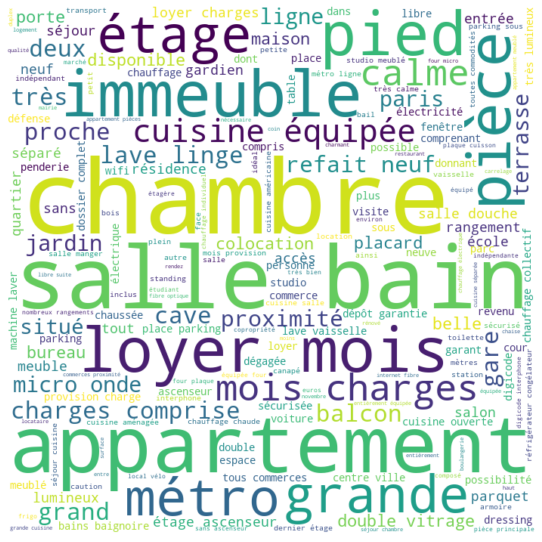

In [96]:
#text= ' '.join(ttx)
wc = WordCloud(width=700, height=700, background_color="white").generate(ttx)
my_dpi = 72
plt.figure(figsize = (700/my_dpi, 700/my_dpi), dpi=my_dpi)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

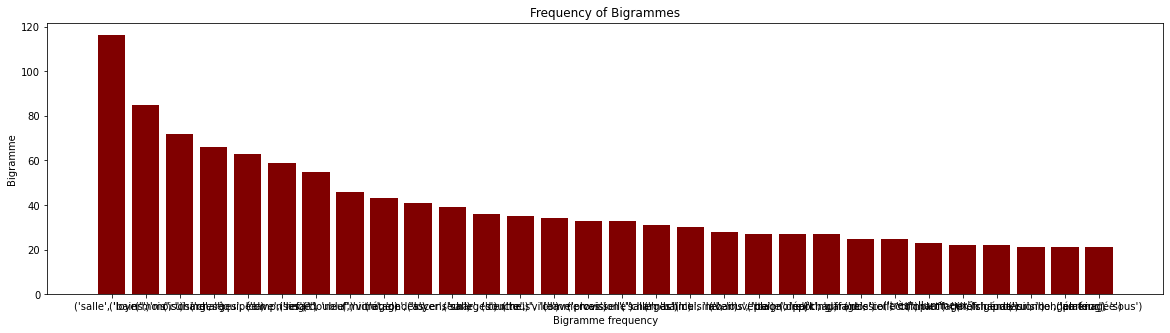

In [97]:
bigrams_ext = [w for w in ngrams(words_le, n=2)]
d = Counter(bigrams_ext).most_common(30)
list2 = []
list1= []
for i in range(len(d)):
    list2.append(str(d[i][0]))
    list1.append(int(d[i][1]))
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(list2, list1, color ='maroon', width = 0.8)
 
plt.xlabel("Bigramme frequency")
plt.ylabel("Bigramme")
plt.title("Frequency of Bigrammes")
plt.show()

In [116]:
Counter(words_le).most_common(40)

[('cuisine', 258),
 ('salle', 255),
 ('charges', 210),
 ('appartement', 209),
 ('loyer', 186),
 ('très', 168),
 ('étage', 164),
 ('chambre', 163),
 ('mois', 158),
 ('équipée', 148),
 ('chauffage', 130),
 ('calme', 126),
 ('immeuble', 125),
 ('bains', 125),
 ('commerces', 122),
 ('pied', 122),
 ('pièces', 110),
 ('chambres', 107),
 ('meublé', 104),
 ('séjour', 104),
 ('métro', 99),
 ('grand', 98),
 ('double', 97),
 ('parking', 97),
 ('lave', 96),
 ('neuf', 94),
 ('entrée', 92),
 ('proche', 91),
 ('proximité', 90),
 ('grande', 88),
 ('gare', 87),
 ('linge', 85),
 ('douche', 82),
 ('résidence', 78),
 ('ascenseur', 77),
 ('entièrement', 74),
 ('situé', 73),
 ('lumineux', 72),
 ('sans', 72),
 ('salon', 72)]

In [156]:
def isusefull(val):
    if val[len(val)-1].isalpha() and val[:len(val)-2].isdigit():
        return True
    return False
def fix_it(val):
    if isusefull(val):
        t = []
        for i in range(len(val)-1):
            t.append(val[i])
        a = ''.join(t)
        return a
    return None

In [111]:
for i in df['description']:
    print(i)

Paris 12ème. Charmant duplex, entièrement meublé, 31 m².
Au 3ème et dernier étage d'un petit immeuble calme.
Bon état, très lumineux, sans vis à vis.

Colocation acceptée.

Très bien desservi par les transports publics : - métro ligne 1, Porte de Vincennes , à 50 mètres,
- tramways T3a et T3b, en face,
- RER A Nation à 6 min,
- 6 bus : 26, 64, 86, 501, 351 (Roissypole).

Entrée et salon avec joli parquet et escalier
pour monter dans la chambre, poutres apparentes.
Cuisine équipée: four, réfrigérateur 2 portes, microondes,
Salle de bains avec baignoire, wc séparés,

Lave-linge.
Double vitrage.
Interphone, digicode (badge).

Quartier agréable. Tous commerces.
Vélib et parking à vélos en face. Autolib à 50 mètres.

Libre immédiatement. Visites individuelles sur rendez-vous
Loyer : 1025 E + charges 99 E
merci d'appeler de 13h à 23h
si je ne réponds pas, je rappelle
Colocation Idéalement située, car proche des écoles, universités, de la gare Pontoise et également à 5 min de plusieurs commod

In [200]:
eq_cuisine = []
ascenseur = []
s_machine = []
parking_co = []
v_eq = []
neuf = []
for row in df['description']:
    #i+=1
    #print(i)
    tokens = WordPunctTokenizer().tokenize(row)
    tkens_l = [s for s in tokens if s.isalpha() or s.isdigit() or isusefull(s)]
    tokens_cl = [tk for tk in tkens_l if tk not in stopWords]
    #tokens_cl = [s for s in tokens_c if not len(s) < 4]
    bigrams = [w for w in ngrams(tokens_cl, n=2)]
    bigram = set(bigrams)
    flag = True
    e= 0
    p =0
    ad=0
    cv = 0
    s=0
    c=0
    ca = 0
    ce = 0
    se = 0
    for bigr in bigram:
        if bigr== ('cuisine', 'équipée'):
            e = e +1
            eq_cuisine.append(1)
        
        if bigr==('cuisine', 'aménagée') and e==0:
            e = e +1
            eq_cuisine.append(1)
        if bigr==('séjour', 'cuisine') and e==0:
            e = e +1
            eq_cuisine.append(1)
        if bigr== ('sans', 'ascenseur'):
            p = p +1
            ascenseur.append(1)
        if bigr== ('machine', 'laver'):
            ad = ad +1
            s_machine.append(1)
        if bigr== ('place', 'parking'):
            cv = cv +1
            parking_co.append(1)
        if bigr== ('lave', 'vaisselle'):
            ca = ca +1
            v_eq.append(1)
        if bigr == ('refait', 'neuf'):
            ce = ce + 1
            neuf.append(1)
    if e == 0:
        eq_cuisine.append(0)
    if p == 0:
        ascenseur.append(0)
    if ad == 0:
        s_machine.append(0)
    if cv == 0:
        parking_co.append(0)
    if ca == 0:
        v_eq.append(0)
    if ce == 0:
        neuf.append(0)
print(len(eq_cuisine))
print(eq_cuisine)

249
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [121]:
for i in df['description']:
    print(i)

Paris 12ème. Charmant duplex, entièrement meublé, 31 m².
Au 3ème et dernier étage d'un petit immeuble calme.
Bon état, très lumineux, sans vis à vis.

Colocation acceptée.

Très bien desservi par les transports publics : - métro ligne 1, Porte de Vincennes , à 50 mètres,
- tramways T3a et T3b, en face,
- RER A Nation à 6 min,
- 6 bus : 26, 64, 86, 501, 351 (Roissypole).

Entrée et salon avec joli parquet et escalier
pour monter dans la chambre, poutres apparentes.
Cuisine équipée: four, réfrigérateur 2 portes, microondes,
Salle de bains avec baignoire, wc séparés,

Lave-linge.
Double vitrage.
Interphone, digicode (badge).

Quartier agréable. Tous commerces.
Vélib et parking à vélos en face. Autolib à 50 mètres.

Libre immédiatement. Visites individuelles sur rendez-vous
Loyer : 1025 E + charges 99 E
merci d'appeler de 13h à 23h
si je ne réponds pas, je rappelle
Colocation Idéalement située, car proche des écoles, universités, de la gare Pontoise et également à 5 min de plusieurs commod

In [162]:
tk = WordPunctTokenizer().tokenize(df['description'][15])
tkens_l = [s for s in tk if s.isalpha() or s.isdigit() or isusefull(s)]
#tkens_l
tkens_li = [tk.lower() for tk in tkens_l if tk not in stopWords]
tkens_li

['centre',
 'ville',
 'bougival',
 'bord',
 'seine',
 'studio',
 'mezzanine',
 '28',
 '1er',
 'étage',
 'sans',
 'ascenseur',
 'pas',
 'parking',
 'pas',
 'cave',
 'niveau',
 '1',
 'cuisine',
 'ouverte',
 'séjour',
 'salle',
 'eau',
 'double',
 'wc',
 'niveau',
 '2',
 '1',
 'chambre',
 'mezzanine',
 'nombreux',
 'rangements',
 'visiophone',
 'proximité',
 'transports',
 'commerces',
 'la',
 'défense',
 'dossier',
 'complet',
 'demandé',
 'libre',
 '705',
 'mois',
 '45',
 'provision',
 'charges',
 'proximité',
 'transports',
 'commerces',
 'bus',
 '259',
 'bus',
 'd',
 'la',
 'défense',
 'garantie',
 'revenu',
 '3',
 'x',
 'loyer',
 'demandé',
 'fournir',
 'dossier',
 'complet',
 'contact',
 'uniquement',
 'téléphone',
 '06',
 '17',
 '11',
 '88',
 '58',
 'agence',
 'abstenir']

In [177]:
loyer = []
mots = []
for row in df['description']:
    tokens = WordPunctTokenizer().tokenize(row)
    tkens_l = [s for s in tokens if s.isalpha() or s.isdigit() or isusefull(s)]
    tokens_cl = [tk.lower() for tk in tkens_l if tk not in stopWords]
    #tokens_cl = [s for s in tokens_c if not len(s) < 4]
    flag = True
    for i in range(len(tokens_cl)):
        if tokens_cl[i]=='loyer':
            if i+2<len(tokens_cl)-2:
                for j in range(i+1,i+3):
                    anci = []
                    if tokens_cl[j].isdigit():
                        anci.append(tokens_cl[j])
                        for n in range(j+1,j+2) :
                            if tokens_cl[n].isdigit():
                                anci.append(tokens_cl[n])
                                break
                        a=''.join(anci)
                        loyer.append(int(a))
                        flag= False
                        break
                    elif isusefull(tokens_cl[j]) and flag== True:
                        loyer.append(fix_it(tokens_cl[j]))
                        flag= False
                        break
            elif tokens_cl[i+1].isdigit():
                loyer.append(tokens_cl[i+1])
                flag= False
                break
    if flag== True:
            loyer.append(-1)
    
for i in range(10):
    loyer.pop()
print(len(loyer))
print(loyer)

249
[1025, 500, -1, -1, 2880, 1700, 620, 990, 805, -1, -1, 1450, 1294, -1, -1, -1, -1, 590, -1, -1, 1, -1, 1040, -1, -1, -1, 69000, 1900, -1, -1, -1, 1368, -1, 790, -1, -1, 750, 1040, -1, 450, -1, -1, -1, -1, -1, -1, 2890, -1, -1, -1, 700, 950, 1780, 1000, 780, 1195, -1, -1, -1, 792, 820, 1, -1, 720, 14403, 875, -1, 500, -1, 890, -1, 1450, 740, 1250, 790, -1, -1, -1, -1, -1, -1, 1000, 1400, 1000, 3, 780, -1, -1, 1100, 11007, -1, -1, -1, -1, 1060, -1, -1, 1020, 1440, -1, -1, 650, 690, -1, -1, 1510, 2, 880, 700, 650, 670, -1, -1, 1350, -1, -1, -1, 1150, -1, -1, -1, 884, 1400, -1, -1, 1150, 690, 1790, 580100, -1, -1, -1, 570, -1, 795, -1, -1, -1, -1, 860, -1, '900', -1, 960, 520, 3, 2400, -1, 680, 470, -1, 1050, -1, 2100, 660, -1, -1, 1200, -1, -1, 900, 770, -1, 960, 2950, 1300, 580, -1, -1, 490, 590, 1150, 2450, -1, -1, -1, -1, 520, -1, -1, -1, -1, 1200, -1, 1575, -1, 1300, 1380, 910, -1, -1, 620, 670, -1, -1, -1, -1, -1, 890, -1, 1105, 690, -1, 710, 807, 2000, 1697, '2395', 2500, -1, -1

In [182]:
print(Counter(words_le).most_common(80))

[('cuisine', 258), ('salle', 255), ('charges', 210), ('appartement', 209), ('loyer', 186), ('très', 168), ('étage', 164), ('chambre', 163), ('mois', 158), ('équipée', 148), ('chauffage', 130), ('calme', 126), ('immeuble', 125), ('bains', 125), ('commerces', 122), ('pied', 122), ('pièces', 110), ('chambres', 107), ('meublé', 104), ('séjour', 104), ('métro', 99), ('grand', 98), ('double', 97), ('parking', 97), ('lave', 96), ('neuf', 94), ('entrée', 92), ('proche', 91), ('proximité', 90), ('grande', 88), ('gare', 87), ('linge', 85), ('douche', 82), ('résidence', 78), ('ascenseur', 77), ('entièrement', 74), ('situé', 73), ('lumineux', 72), ('sans', 72), ('salon', 72), ('four', 70), ('comprises', 70), ('balcon', 68), ('disponible', 67), ('centre', 67), ('cave', 66), ('jardin', 65), ('chaude', 60), ('deux', 60), ('tout', 59), ('refait', 59), ('quartier', 57), ('libre', 57), ('studio', 57), ('pièce', 57), ('paris', 54), ('ligne', 54), ('tous', 53), ('sous', 53), ('bien', 51), ('porte', 51), (

In [201]:
cave = []
chauffage = []
meuble = []
neuf = []
parking = []
balcon = []
jardin = []
baignoire=[]
colocation = []
metro = []
vitrage=[]
terrasse=[]
for row in df['description']:
    tokens = WordPunctTokenizer().tokenize(row)
    tkens_l = [s for s in tokens if s.isalpha()]
    tokens_cl = [tk for tk in tkens_l if tk not in stopWords]
    #tokens_cl = [s for s in tokens_c if not len(s) < 4]
    #bigrams = [w for w in ngrams(tokens_cl, n=2)]
    tkns = set(tokens_cl)
    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    j=0
    h=0
    g=0
    k=0
    l=0
    m=0
    for t in tkns:
        if t=='meublé':
            a = a+1
            meuble.append(1)
        if t=='parking':
            b = b+1
            parking.append(1)
        if t=='cave':
            c = c+1
            cave.append(1)
        if t=='neuf':
            d = d+1
            neuf.append(1)
        if t=='balcon':
            e = e+1
            balcon.append(1)
        if t=='terrasse':
            f = f+1
            terrasse.append(1)
        if t=='jardin':
            j = j+1
            jardin.append(1)
        if t=='colocation':
            h = h+1
            colocation.append(1)
        if t=='baignoire':
            g=g+1
            baignoire.append(1)
        if t=='métro':
            k= k+1
            metro.append(1)
        if t=='vitrage':
            l= l+1
            vitrage.append(1)
        if t=='chauffage':
            m = m+1
            chauffage.append(1)
    if a==0:
        meuble.append(0)
    if b==0:
        parking.append(0)
    if c==0:
        cave.append(0)
    if d==0:
        neuf.append(0)
    if e==0:
        balcon.append(0)
    if f==0:
        terrasse.append(0)
    if j==0:
        jardin.append(0)
    if h==0:
        colocation.append(0)
    if g==0:
        baignoire.append(0)
    if k==0:
        metro.append(0)
    if l==0:
        vitrage.append(0)
    if m==0:
        chauffage.append(0)
print(len(meuble))
print(terrasse)            

249
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [202]:
ascenseur_a=[]

ar = []
for i in range(len(ascenseur)):
    if ascenseur[i]==1:
        ar.append('0')
    else : ar.append('1')
for i in range(len(ar)):
    if ar[i]=='1':
        ascenseur_a.append(1)
    elif ar[i]=='0' :
        ascenseur_a.append(0)
print(len(ascenseur_a))
print(ascenseur_a)

249
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [203]:
ascenseurs=[]
#for i in range(len(df['description'])):
for j in range(len(ascenseur_a)):
    if ascenseur_a[j]==0:
        ascenseurs.append(0)
    else : 
        i=0
        token = WordPunctTokenizer().tokenize(df['description'][j])
        for tk in token:
            if tk=='ascenseur':
                i =+1
                ascenseurs.append(1)
                break
        if i==0:
            ascenseurs.append(0)
print(len(ascenseurs))
print(ascenseurs)

249
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [220]:
dictu={'type_location':types_, 'nom_commune':nom_commune, 'code_departement':codedep, 'code_commune':codecomm, 'prix_location':price, 'nb_pieces':pieces, 'nb_chambres':chambres, 'sbien_m²':met,
   'sterrain_m²':terrains, 'taxe_loyer':loyer, 'cuisine_equipee':eq_cuisine, 'machine_laver':s_machine, 'm_lave_vaisselle':v_eq, 'bien_neuf':neuf,'place_parking':parking_co,
   'ascenseur':ascenseurs, 'cave':cave, 'chauffage':chauffage, 'vitrage':vitrage, 'parking':parking, 'baignoire':baignoire, 'balcon':balcon,
   'jardin':jardin, 'meublé':meuble, 'colocation':colocation, 'approximite_metro':metro, 'terrasse':terrasse}
date_new= pd.DataFrame(data=dictu)
date_new.to_csv('house_rent_data')
date_new

,type_location,nom_commune,code_departement,code_commune,prix_location,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,taxe_loyer,...,chauffage,vitrage,parking,baignoire,balcon,jardin,meublé,colocation,approximite_metro,terrasse
0,Appartement,Paris 12e Arrondissement,75,75056,1124,2,1,31,0,1025,...,0,1,1,1,0,0,1,0,1,0
1,Appartement,Boisemont,95,95074,520,1,1,22,0,500,...,1,0,0,0,0,0,0,0,0,1
2,Appartement,Noisy-le-Grand,93,93051,910,2,1,38,0,-1,...,0,0,0,0,1,0,0,0,0,0
3,Appartement,Paris 9e Arrondissement,75,75056,1224,2,1,29,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Appartement,Courbevoie,92,92026,2880,4,3,105,0,2880,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Appartement,Fleury-Mérogis,91,91235,1000,3,2,62,0,1840,...,0,0,1,0,0,0,0,0,0,0
245,Appartement,Choisy-le-Roi,94,94022,780,2,1,40,0,-1,...,0,0,0,0,0,0,0,0,0,0
246,Appartement,Bagnolet,93,93006,1200,2,1,50,0,1680,...,0,1,0,0,0,0,1,0,0,0
247,Appartement,Boisemont,95,95074,500,1,1,13,0,1680,...,0,0,0,0,0,1,0,0,0,0


In [212]:
types_cd=[]
for i in types_:
    if i=='Maison':
        types_cd.append(1)
    else : types_cd.append(0)
print(len(types_cd))

249


In [221]:

dic={'type_location':types_cd, 'code_departement':codedep, 'code_commune':codecomm, 'prix_location':price, 'nb_pieces':pieces, 'nb_chambres':chambres, 'sbien_m²':met,
   'sterrain_m²':terrains, 'taxe_loyer':loyer, 'cuisine_equipee':eq_cuisine, 'machine_laver':s_machine, 'm_lave_vaisselle':v_eq, 'bien_neuf':neuf, 'place_parking':parking_co,
   'ascenseur':ascenseurs, 'cave':cave, 'chauffage':chauffage, 'vitrage':vitrage, 'parking':parking, 'baignoire':baignoire, 'balcon':balcon,
   'jardin':jardin, 'meublé':meuble, 'colocation':colocation, 'approximite_metro':metro, 'terrasse':terrasse}
date_n= pd.DataFrame(data=dic)
date_n.to_csv('house_rent_data_models')
date_n

,type_location,code_departement,code_commune,prix_location,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,taxe_loyer,cuisine_equipee,...,chauffage,vitrage,parking,baignoire,balcon,jardin,meublé,colocation,approximite_metro,terrasse
0,0,75,75056,1124,2,1,31,0,1025,0,...,0,1,1,1,0,0,1,0,1,0
1,0,95,95074,520,1,1,22,0,500,0,...,1,0,0,0,0,0,0,0,0,1
2,0,93,93051,910,2,1,38,0,-1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,1224,2,1,29,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,92,92026,2880,4,3,105,0,2880,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0,91,91235,1000,3,2,62,0,1840,1,...,0,0,1,0,0,0,0,0,0,0
245,0,94,94022,780,2,1,40,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
246,0,93,93006,1200,2,1,50,0,1680,0,...,0,1,0,0,0,0,1,0,0,0
247,0,95,95074,500,1,1,13,0,1680,1,...,0,0,0,0,0,1,0,0,0,0
